# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
#A used car dealership has hired us figure out what consumers value in a used car.

In [2]:
#The used car market generates over 100 billion in sales per year and has a termendous amount of data so quantitative tools can be relied on here.

In [3]:
#Cars are complex products with many features which people weigh in determining a car's appeal. This means complex models should be used.

In [4]:
#The client here is not a data scientist so while this is a techincal project, it should result in an easy to understand summary.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [5]:
#1 - Import the data
#2 - Run basic commands like .head, .describe, sum null
#3 - Explore the data through visualization. Decide what data would be better understood through visualization. An obvious one here would be prices because this project is focued on vehcile prices
#4 - Explore the data through coorlation analysis to help in feature analysis


#Importing everything first
#Importing libraries
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings 
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

from sklearn.metrics import mean_squared_error

#importing data
data = pd.read_csv('data/vehicles.csv')

#the first thing I want to understand are the columns and how the pricing data currently looks.
display(data.head()) #to understand the columns
display(data['price'].describe()) # to understand the pricing column in more detail

#the price column has some issues. There is a car that cost nearly $4 billion in it

#Since price has some issues, lets look at the min and max of every column

min_values = data.min()
max_values = data.max()

print("Minimum Values:\n", min_values)
print("\nMaximum Values:\n", max_values)

#we can drop zero values for price and odometer. Unlikely a car for sale is free, no used car has zero miles. These are mistakes.
#we can drop odometers over 1 million based on my knowledge of cars. These are either mistakes or strange outliers. We will check how many there are.

over_one_million = data[data['odometer'] > 1000000] #seeing how bad the outlier situation is
count_over_one_million = over_one_million.shape[0]


print("Number of entries with odometer values over 1 million:", count_over_one_million)




,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

Minimum Values:
 id           7207408119
region      SF bay area
price                 0
year             1900.0
odometer            0.0
state                ak
dtype: object

Maximum Values:
 id                      7317101084
region      zanesville / cambridge
price                   3736928711
year                        2022.0
odometer                10000000.0
state                           wy
dtype: object
Number of entries with odometer values over 1 million: 576


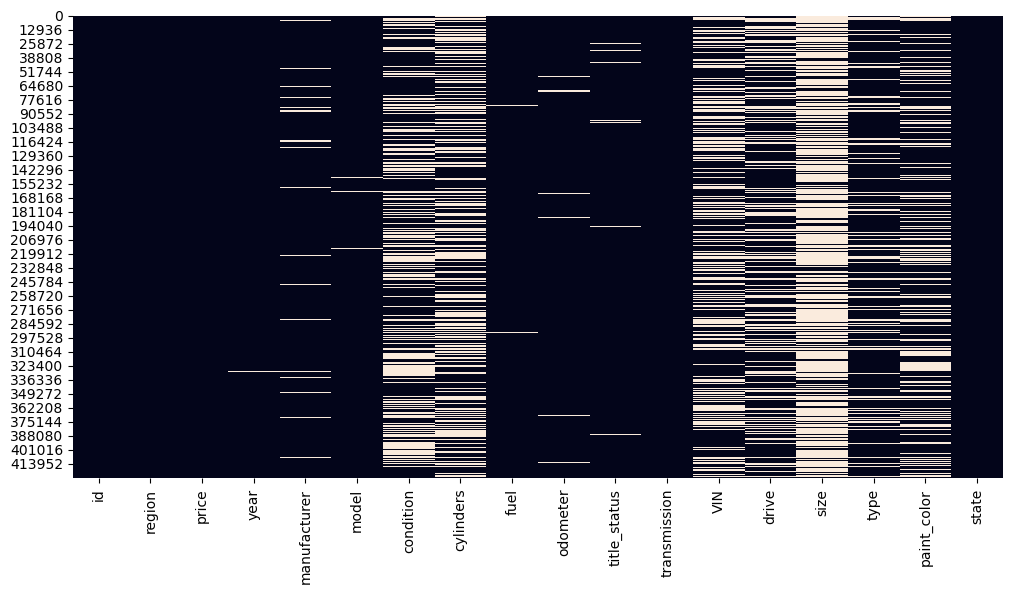

              Total Missing  Percentage
id                        0    0.000000
region                    0    0.000000
price                     0    0.000000
year                   1205    0.282281
manufacturer          17646    4.133714
model                  5277    1.236179
condition            174104   40.785232
cylinders            177678   41.622470
fuel                   3013    0.705819
odometer               4400    1.030735
title_status           8242    1.930753
transmission           2556    0.598763
VIN                  161042   37.725356
drive                130567   30.586347
size                 306361   71.767476
type                  92858   21.752717
paint_color          130203   30.501078
state                     0    0.000000
Number of unique models: 29649
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id   

None

In [6]:
#getting to know the data. .head made it seemed like there are lots of nan so checking
#data.isnull().sum()


#lets look at what that looks like

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

#quantifying the missing as a %

missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_info = pd.DataFrame({'Total Missing': missing_values, 'Percentage': missing_percentage})
print(missing_info)

#I think I can use model data to fill in missing data later. Let's look at model data
unique_model_count = data['model'].nunique()
print("Number of unique models:", unique_model_count)

display(data.info()) #to understand the columns



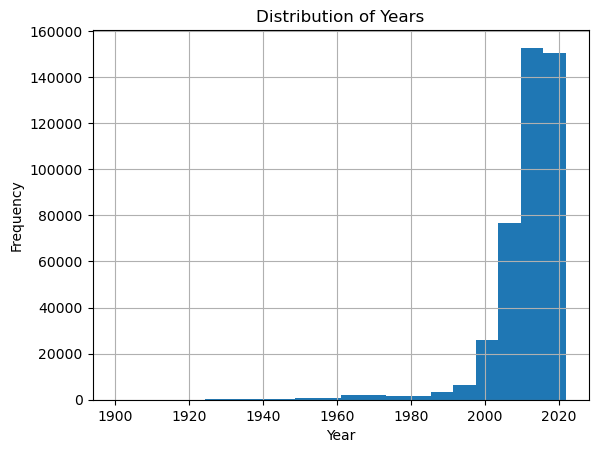

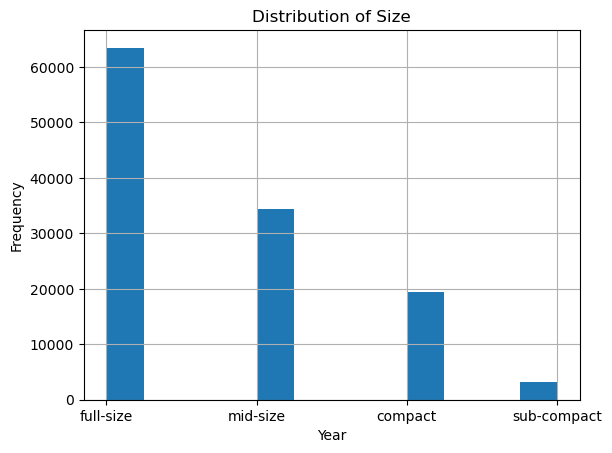

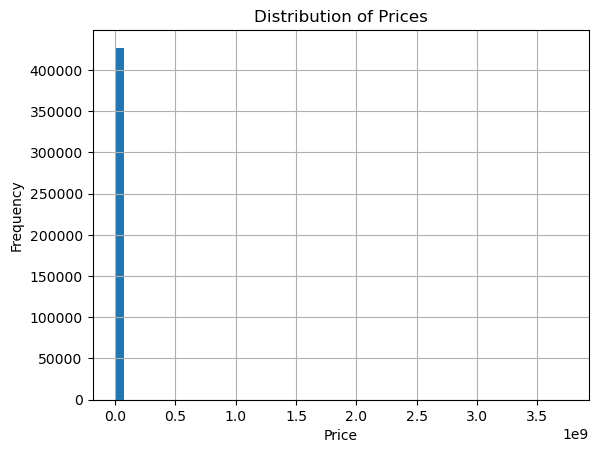

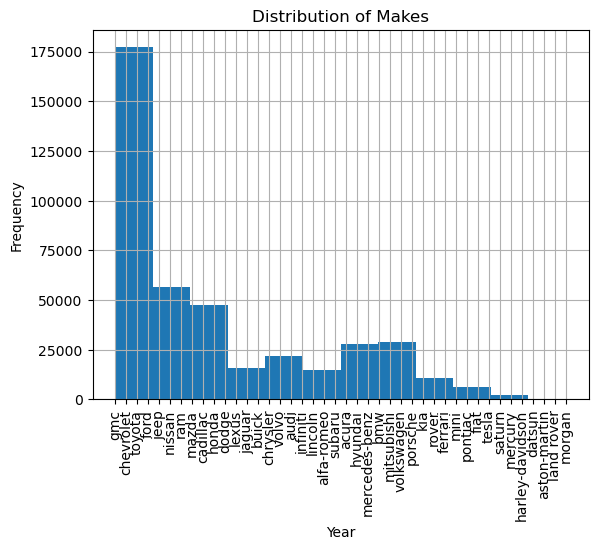

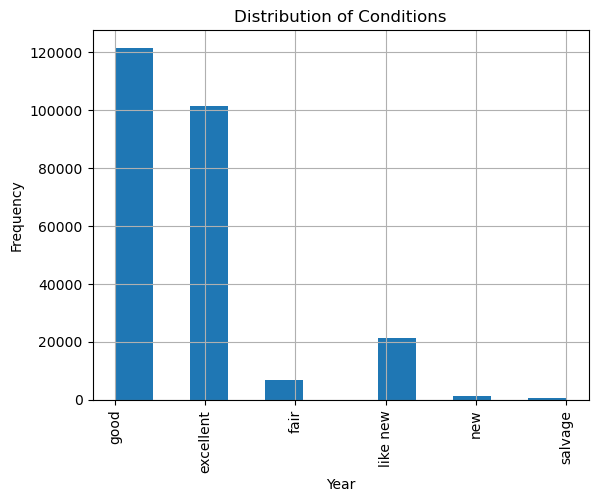

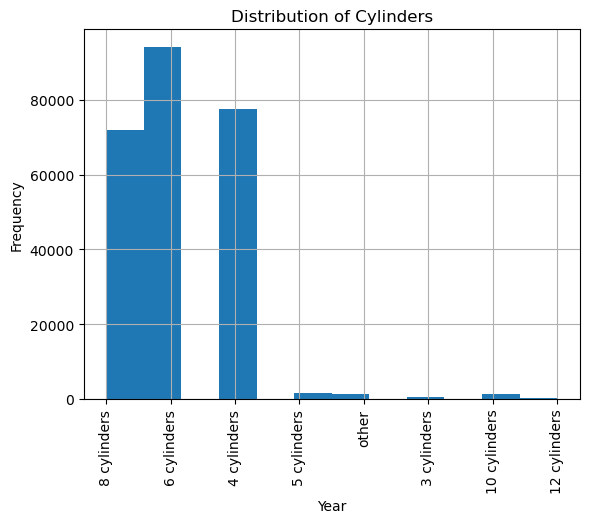

In [7]:
#checking to see how current the data is. I'm going to drop any data from before 20 years ago in the cleaing phase. 
#Classic car pricing is very different than non-classic car pricing. Many dealers don't even overlap

data['year'].hist(bins=20)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years')
plt.show()

#since 71% of sizing data was missing, lets look at the distribution there. 
#we will need to address this column with some thought in cleaning.

data['size'].hist(bins=12)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Size')
plt.show()

#it should be noted that there are no truck or SUV data points in this data set 

#I'm going to try a number of ways to look at price. 
data['price'].hist(bins=50)  # Adjust the number of bins for more or less granularity
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

#manufacturer by year
data['manufacturer'].hist(bins=12)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Makes')
plt.xticks(rotation=90)

plt.show()

data['condition'].hist(bins=12)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Conditions')
plt.xticks(rotation=90)

plt.show()

data['cylinders'].hist(bins=12)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Cylinders')
plt.xticks(rotation=90) 

plt.show()

#i should be able to easily convert this data to integers later



# Exploring Price

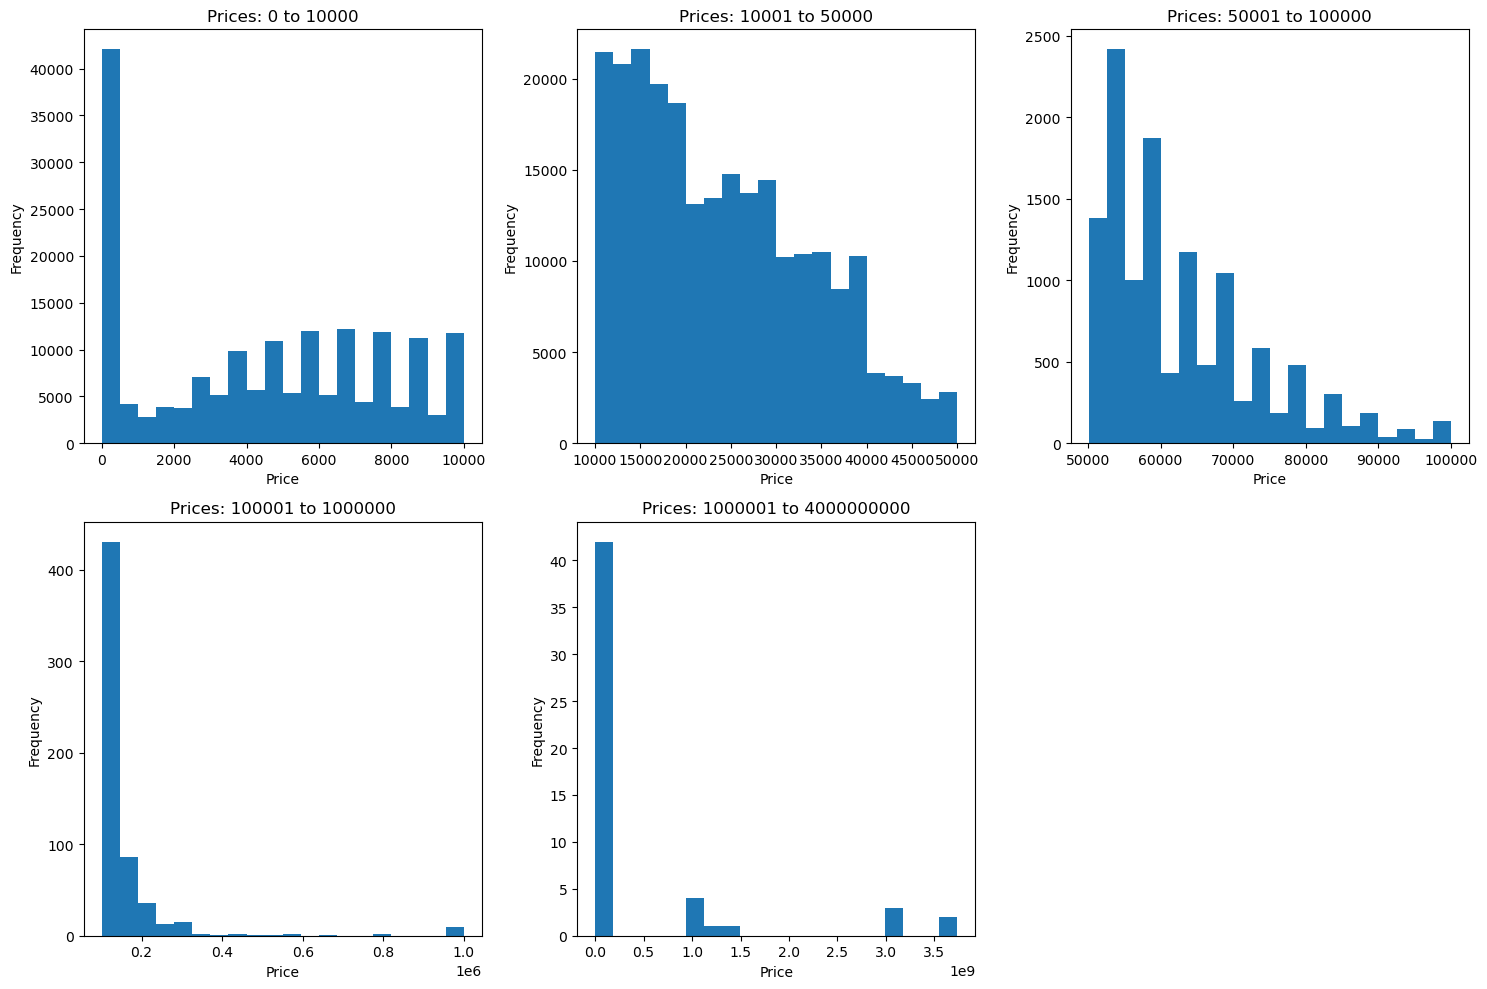

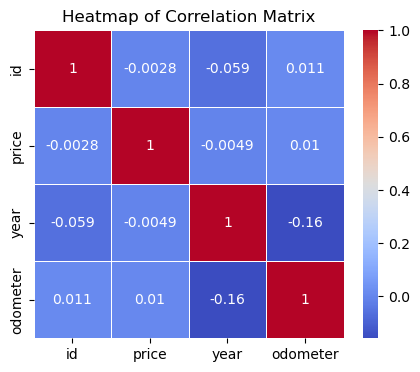

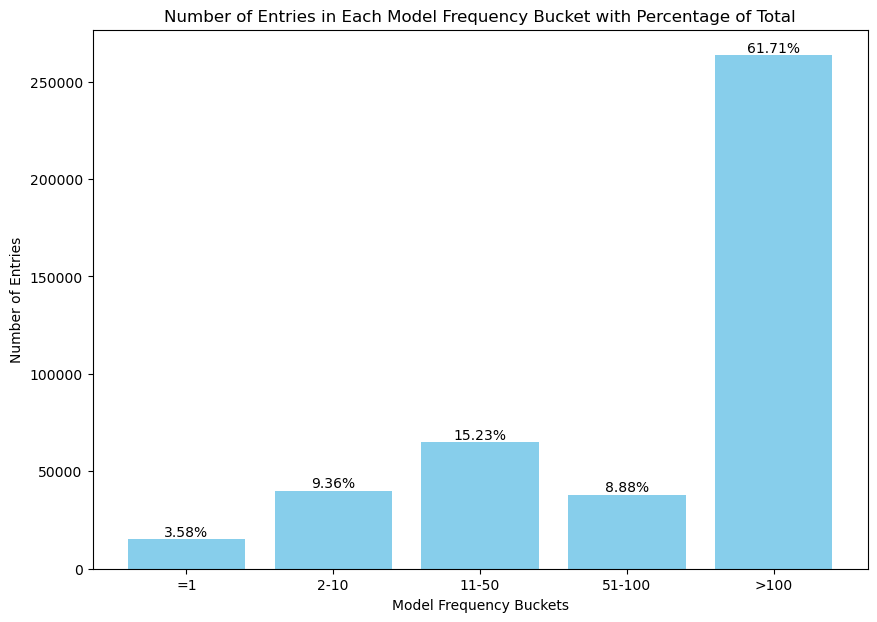

Unique Value Counts for Each Column:
id: 426880
region: 404
price: 15655
year: 114
manufacturer: 42
model: 29649
condition: 6
cylinders: 8
fuel: 5
odometer: 104870
title_status: 6
transmission: 3
VIN: 118246
drive: 3
size: 4
type: 13
paint_color: 12
state: 51


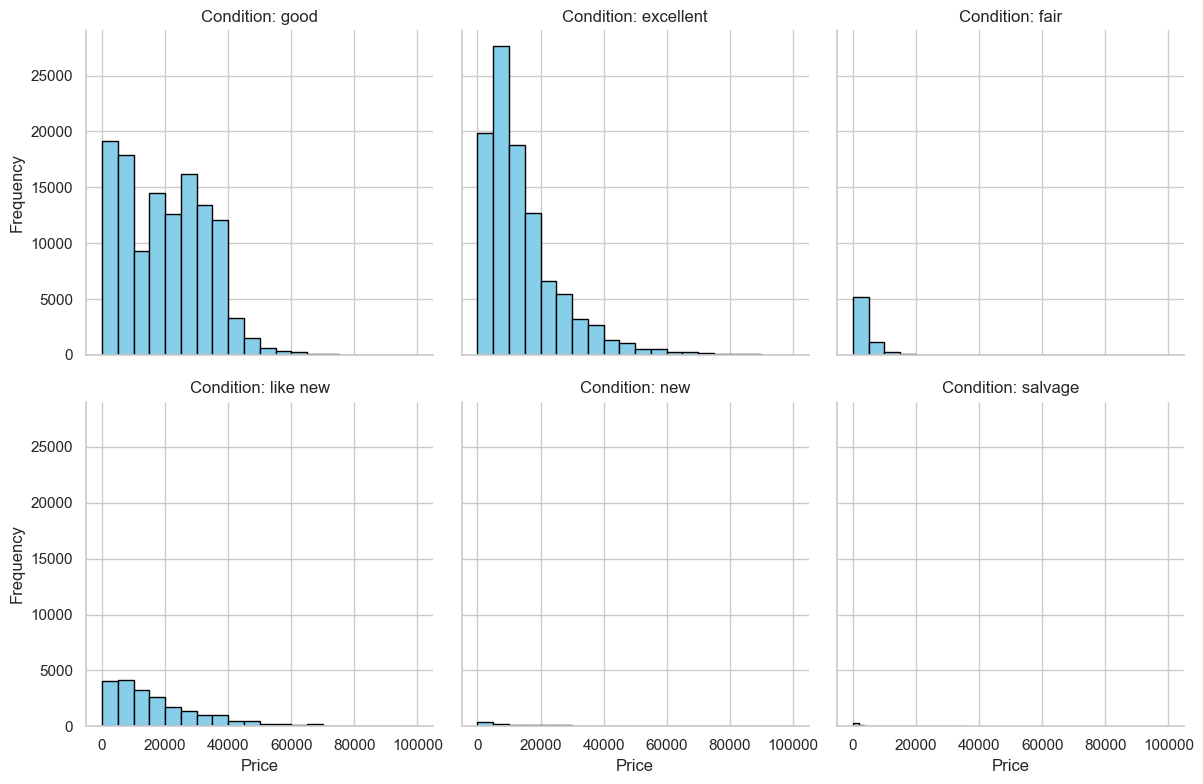

In [8]:
#Exploring price

price_ranges = [(0, 10000), (10001, 50000), (50001, 100000), (100001, 1000000), (1000001, 4000000000)]

n_rows = 2  
n_cols = 3  
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

axes = axes.flatten()

for i, price_range in enumerate(price_ranges):
    subset = data[(data['price'] >= price_range[0]) & (data['price'] <= price_range[1])]
    
   
    axes[i].hist(subset['price'], bins=20)
    axes[i].set_title(f'Prices: {price_range[0]} to {price_range[1]}')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')


plt.tight_layout()

for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j])

plt.show()

#looking at coorleation 


correlation_matrix = data.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


model_counts = data['model'].value_counts()

total_entries = len(data)

exactly_1_entry = model_counts[model_counts == 1].sum()
between_2_and_10_entries = model_counts[(model_counts >= 2) & (model_counts <= 10)].sum()
between_11_and_50_entries = model_counts[(model_counts >= 11) & (model_counts <= 50)].sum()
between_51_and_100_entries = model_counts[(model_counts >= 51) & (model_counts <= 100)].sum()
more_than_100_entries = model_counts[model_counts > 100].sum()

exactly_1_percentage = (exactly_1_entry / total_entries) * 100
between_2_and_10_percentage = (between_2_and_10_entries / total_entries) * 100
between_11_and_50_percentage = (between_11_and_50_entries / total_entries) * 100
between_51_and_100_percentage = (between_51_and_100_entries / total_entries) * 100
more_than_100_percentage = (more_than_100_entries / total_entries) * 100

buckets = ['=1', '2-10', '11-50', '51-100', '>100']
entries = [exactly_1_entry, between_2_and_10_entries, between_11_and_50_entries, between_51_and_100_entries, more_than_100_entries]
percentages = [exactly_1_percentage, between_2_and_10_percentage, between_11_and_50_percentage, between_51_and_100_percentage, more_than_100_percentage]

plt.figure(figsize=(10, 7))
bars = plt.bar(buckets, entries, color='skyblue')

for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(percentage, 2)}%', va='bottom', ha='center')

plt.xlabel('Model Frequency Buckets')
plt.ylabel('Number of Entries')
plt.title('Number of Entries in Each Model Frequency Bucket with Percentage of Total')
plt.show()



# Create an empty dictionary to store the unique value counts for each column
unique_value_counts = {}

for column in data.columns:
    unique_count = data[column].nunique()
    
    unique_value_counts[column] = unique_count

print("Unique Value Counts for Each Column:")
for column, count in unique_value_counts.items():
    print(f"{column}: {count}")




filtered_data = data[data['price'] <= 100000]

sns.set(style="whitegrid")

g = sns.FacetGrid(filtered_data, col="condition", col_wrap=3, height=4)

g = g.map(plt.hist, "price", bins=20, color='skyblue', edgecolor='black')

g.set_titles("Condition: {col_name}")
g.set_axis_labels("Price", "Frequency")

plt.show()






### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

# Making a New Dataset and Cleaning up Model Column

              Total Missing  Percentage
id                        0    0.000000
region                    0    0.000000
price                     0    0.000000
year                      0    0.000000
manufacturer          12511    3.188247
model                  3503    0.892689
condition            163413   41.643434
cylinders            167730   42.743559
fuel                   2662    0.678372
odometer               4216    1.074386
title_status           7723    1.968095
transmission           2421    0.616957
VIN                  134955   34.391325
drive                119599   30.478071
size                 286081   72.903596
type                  80628   20.546877
paint_color          118786   30.270890
state                     0    0.000000
Shape of updated cleaned_data: (247449, 18)


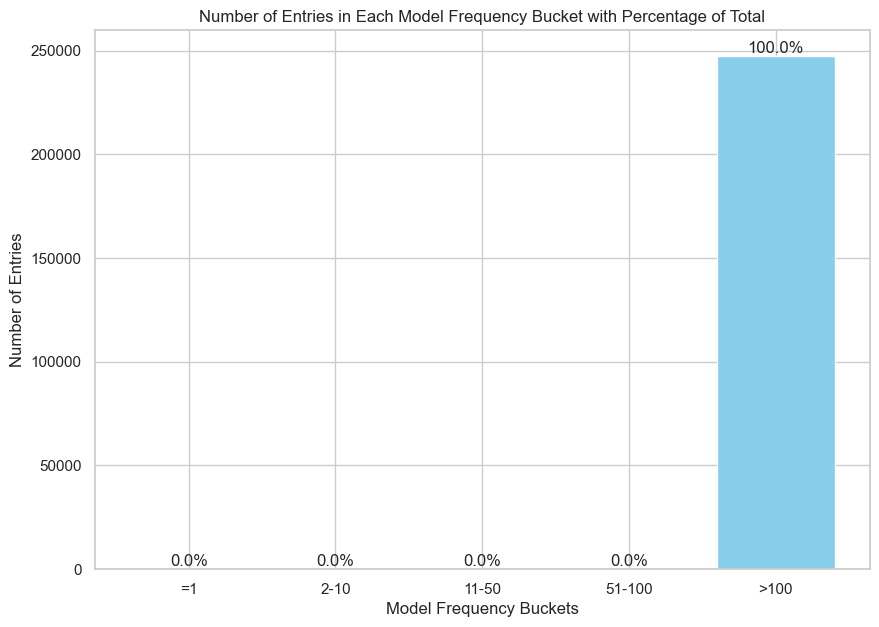

Top 50 Models by Count:
f-150                 7547
silverado 1500        4900
1500                  3979
camry                 2848
altima                2747
escape                2732
accord                2695
silverado             2621
civic                 2611
2500                  2443
wrangler              2435
tacoma                2366
explorer              2353
grand cherokee        2318
corolla               2112
fusion                1978
equinox               1972
cr-v                  1874
focus                 1806
mustang               1735
malibu                1710
sonata                1684
charger               1681
rav4                  1650
grand caravan         1577
tahoe                 1570
impala                1562
sierra 1500           1559
cruze                 1559
silverado 2500hd      1521
outback               1495
elantra               1488
edge                  1471
odyssey               1451
prius                 1430
tundra                1364
3500

In [9]:

#1
#things I noticed 
#1 lots of missing data
#2 lots of non-numeric data which will have to be dealt with
#3 Outlyers which seem like erroneous data

#Plan
#1 make a new dataframe which is cleaner
#2 drop classic cars
#3 Quantify nan
#4 Look at unique and close to unique models. I will drop models which don't have many datapoints

    
#first step is to make a copy to clean
cleaned_data = data.copy()


# Find the maximum year in the dataset
max_year = cleaned_data['year'].max()

# Calculate the cutoff year (cars more recent than 20 years from the max year)
cutoff_year = max_year - 20

# Keep only rows where 'year' is greater than or equal to the cutoff year
cleaned_data = cleaned_data[cleaned_data['year'] >= cutoff_year]

missing_values = cleaned_data.isnull().sum()
missing_percentage = (missing_values / len(cleaned_data)) * 100
missing_info = pd.DataFrame({'Total Missing': missing_values, 'Percentage': missing_percentage})
print(missing_info)

# Calculate the counts of each model
model_counts = cleaned_data['model'].value_counts()

# Identify models with counts greater than or equal to 100
models_to_keep = model_counts[model_counts > 100].index

# Filter cleaned_data to keep only the models with counts greater than 100
cleaned_data = cleaned_data[cleaned_data['model'].isin(models_to_keep)]

# Check the shape of the updated cleaned_data
print("Shape of updated cleaned_data:", cleaned_data.shape)


# Count the frequency of each model in the original dataset
model_counts = cleaned_data['model'].value_counts()

# Calculate the total number of entries
total_entries = len(cleaned_data)

# Group models based on the new specified ranges and count the number of entries in each range
exactly_1_entry = model_counts[model_counts == 1].sum()
between_2_and_10_entries = model_counts[(model_counts >= 2) & (model_counts <= 10)].sum()
between_11_and_50_entries = model_counts[(model_counts >= 11) & (model_counts <= 50)].sum()
between_51_and_100_entries = model_counts[(model_counts >= 51) & (model_counts <= 100)].sum()
more_than_100_entries = model_counts[model_counts > 100].sum()

# Calculate percentages
exactly_1_percentage = (exactly_1_entry / total_entries) * 100
between_2_and_10_percentage = (between_2_and_10_entries / total_entries) * 100
between_11_and_50_percentage = (between_11_and_50_entries / total_entries) * 100
between_51_and_100_percentage = (between_51_and_100_entries / total_entries) * 100
more_than_100_percentage = (more_than_100_entries / total_entries) * 100

# Data for plotting
buckets = ['=1', '2-10', '11-50', '51-100', '>100']
entries = [exactly_1_entry, between_2_and_10_entries, between_11_and_50_entries, between_51_and_100_entries, more_than_100_entries]
percentages = [exactly_1_percentage, between_2_and_10_percentage, between_11_and_50_percentage, between_51_and_100_percentage, more_than_100_percentage]

# Create bar plot
plt.figure(figsize=(10, 7))
bars = plt.bar(buckets, entries, color='skyblue')

# Add percentage labels on each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(percentage, 2)}%', va='bottom', ha='center')

plt.xlabel('Model Frequency Buckets')
plt.ylabel('Number of Entries')
plt.title('Number of Entries in Each Model Frequency Bucket with Percentage of Total')
plt.show()

# Count the occurrences of each model and sort them in descending order
model_counts = cleaned_data['model'].value_counts()

# Display the top 50 models by count
top_50_models = model_counts.head(50)

# Display the bottom 50 models by count
bottom_50_models = model_counts.tail(50)

print("Top 50 Models by Count:")
print(top_50_models)

print("\nBottom 50 Models by Count:")
print(bottom_50_models)





# Cleaning up Manufacturer Data

In [10]:
#2
#cleaning up manufacturer as well. Too many of them with low counts. 
# Calculate the counts of each manufactuerer 
manufacturer_counts = cleaned_data['manufacturer'].value_counts()
manufacturers_to_keep = manufacturer_counts[manufacturer_counts > 100].index
cleaned_data = cleaned_data[cleaned_data['manufacturer'].isin(manufacturers_to_keep)]
manufacturer_counts = cleaned_data['manufacturer'].value_counts()

top_10_manufacturer = manufacturer_counts.head(10)

bottom_10_manufacturer = manufacturer_counts.tail(10)

print("Top 10 manufacturers by Count:")
print(top_10_manufacturer)

print("Bottom 10 manufacturers by Count:")
print(bottom_10_manufacturer)








Top 10 manufacturers by Count:
ford         44605
chevrolet    36711
toyota       22540
honda        14717
jeep         13331
nissan       12404
ram          10856
gmc          10277
dodge         8458
hyundai       6985
Name: manufacturer, dtype: int64
Bottom 10 manufacturers by Count:
mini          1148
pontiac        806
rover          731
saturn         555
jaguar         532
tesla          510
mercury        490
alfa-romeo     488
porsche        244
fiat           191
Name: manufacturer, dtype: int64


# Using model to fill in missing data. 
We have a lot of model data but are missing a lot of size and type data. I can use the most common size and type for various models to make new size and type columns called "model based size" and "model based type".

In [11]:
#3
#Assuming cleaned_data is your DataFrame
# Group by 'model' and find the most common 'size' for each model
most_common_sizes = cleaned_data.groupby('model')['size'].agg(lambda x: pd.Series.mode(x).tolist())

# Resolve ties by choosing the first mode value, convert empty lists to NaN
most_common_sizes = most_common_sizes.apply(lambda x: x[0] if len(x) > 0 else np.nan)

# Convert the result into a dictionary
most_common_sizes_dict = most_common_sizes.to_dict()

# Create a new column 'model based size' by mapping model names to sizes using the most_common_sizes directory
cleaned_data['model based size'] = cleaned_data['model'].map(most_common_sizes)

###Same for Type now

most_common_type = cleaned_data.groupby('model')['type'].agg(lambda x: pd.Series.mode(x).tolist())
most_common_type = most_common_type.apply(lambda x: x[0] if len(x) > 0 else np.nan)
most_common_type_dict = most_common_type.to_dict()
cleaned_data['model based type'] = cleaned_data['model'].map(most_common_type)

most_common_type = cleaned_data.groupby('model')['type'].agg(lambda x: pd.Series.mode(x).tolist())

# Resolve ties by choosing the first mode value, convert empty lists to NaN
most_common_type = most_common_type.apply(lambda x: x[0] if len(x) > 0 else np.nan)

# Convert the result into a dictionary
most_common_type_dict = most_common_type.to_dict()

cleaned_data['model based type'] = cleaned_data['model'].map(most_common_type)




                  Total Missing  Percentage
region                        0    0.000000
price                         0    0.000000
year                          0    0.000000
manufacturer                  0    0.000000
model                         0    0.000000
condition                110229   46.111274
cylinders                102565   42.905250
odometer                      0    0.000000
title_status               1943    0.812801
drive                     70215   29.372516
paint_color               69393   29.028655
model based size          22627    9.465384
model based type              0    0.000000


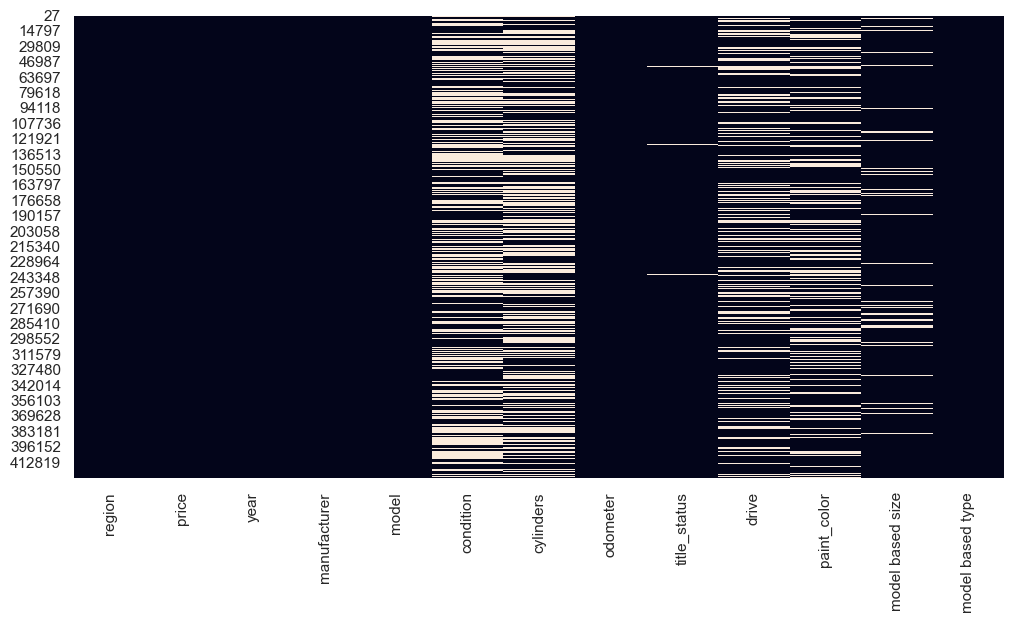

Number of rows before dropping NaNs: 239050
Number of rows after dropping NaNs: 64492
Number of rows that will be lost: 174558


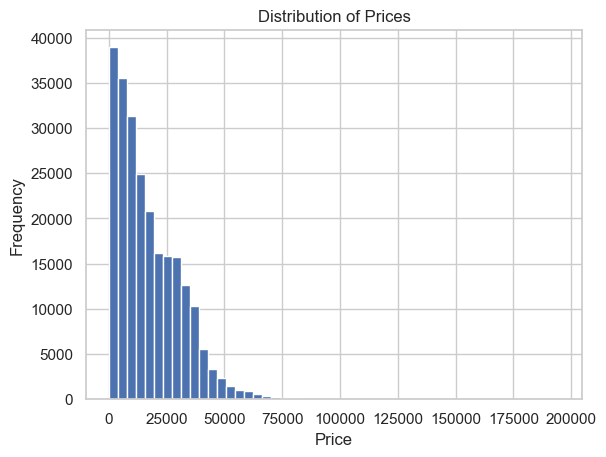


Maximum Values:
 region              zanesville / cambridge
price                               195000
year                                2022.0
manufacturer                         volvo
model                      yukon xl denali
odometer                          249900.0
model based type                     wagon
dtype: object


In [12]:
#4
#dropping size
#dropping type
#dropping vin
#dropping state
#dropping fuel
#dropping transmission
#dropping id
#cleaning price outliers
#cleaning odo outliers
#cleaning condition by removing new
#dropping cyclinders because it mostly is in model


#In the future we will have to deal with
#switching strings to integers 
#manufacturer via One-Hot
#model via One-Hot
#drive binary 4wd or not. Any other combo, model is a proxy. 
#paint color one-hot
#state one-hot
#model based sized ordinal
#model based type one-hot
#title status can be binary
#condition to integers via Ordinal Encoding
#drive with ordinal





cleaned_data.drop(columns='size', axis=1, inplace=True)
cleaned_data.drop(columns='type', axis=1, inplace=True)
cleaned_data.drop(columns='VIN', axis=1, inplace=True)
cleaned_data.drop(columns='state', axis=1, inplace=True)
cleaned_data.drop(columns='fuel', axis=1, inplace=True)
cleaned_data.drop(columns='transmission', axis=1, inplace=True) # model is mostly a proxy in the US, not in EU, I know. 
#cleaned_data.drop(columns='cylinders', axis=1, inplace=True) #model is often a proxy of cylinders
cleaned_data.drop(columns='id', axis=1, inplace=True) #not useful


cleaned_data = cleaned_data[cleaned_data['price'] < 500000] # There is no intent for this model to work on supercars. 
cleaned_data = cleaned_data[cleaned_data['odometer'] < 250000] # Very very few cars actual have over 1 million miles. Using 950k because of 999k values. Its more likely an error than a real number. 
cleaned_data = cleaned_data[cleaned_data['condition'] != 'new']


#looking at impact of changes

missing_values = cleaned_data.isnull().sum()
missing_percentage = (missing_values / len(cleaned_data)) * 100
missing_info = pd.DataFrame({'Total Missing': missing_values, 'Percentage': missing_percentage})
print(missing_info)

plt.figure(figsize=(12, 6))
sns.heatmap(cleaned_data.isnull(), cbar=False)
plt.show()

original_row_count = cleaned_data.shape[0]

new_row_count = cleaned_data.dropna().shape[0]

# Calculate the number of rows that will be lost
rows_lost = original_row_count - new_row_count

print(f"Number of rows before dropping NaNs: {original_row_count}")
print(f"Number of rows after dropping NaNs: {new_row_count}")
print(f"Number of rows that will be lost: {rows_lost}")

cleaned_data['price'].hist(bins=50)  
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

cleaned_max_values = cleaned_data.max()
print("\nMaximum Values:\n", cleaned_max_values)






In [13]:
#5 dropping nan

cleaned_data = cleaned_data.dropna()

object
excellent    32512
good         23754
like new      6796
fair          1312
salvage        118
Name: condition, dtype: int64


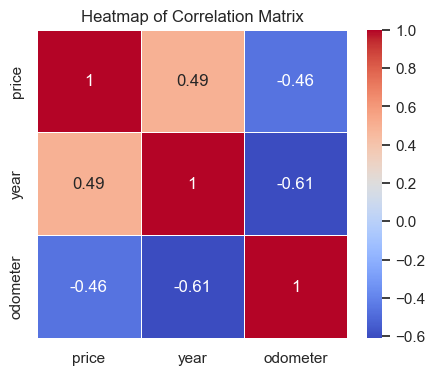

In [14]:
#6
#switching strings to integers 
#condition to integers via Ordinal Encoding
#manufacturer via One-Hot
#model via One-Hot
#title status can be binary
#drive binary 4wd or not. Any other combo, model is a proxy. 
#paint color one-hot
#region one-hot
#model based sized ordinal
#model based type one-hot
#then drop.nan


# Define the order for ordinal encoding
#condition_mapping = {
  # 'salvage': 0,
   # 'fair': 1,
  #  'good': 2,
   #'excellent': 3,
   # 'like new': 4,
    
#}


#one hot time

columns_to_encode = ['model based type','manufacturer','model','region','paint_color','title_status','drive','cylinders','model based size','condition',]  # Replace with your actual column names


encoded_data = pd.get_dummies(cleaned_data, columns=columns_to_encode)

#looking at coorelation


correlation_matrix = cleaned_data.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')

print(cleaned_data['condition'].dtype)

print(cleaned_data['condition'].value_counts())






# Summary of Cleaned Data

,manufacturer,Average Year,Most Common Condition,Most Common Type,Average Odometer
0,acura,2010.008333,excellent,sedan,125908.886667
1,alfa-romeo,2018.000000,like new,hatchback,27500.000000
2,audi,2011.691743,excellent,sedan,99906.928440
3,bmw,2011.804542,excellent,sedan,97411.754258
4,buick,2011.580286,excellent,sedan,103038.220986
5,cadillac,2010.398656,excellent,SUV,110589.660694
6,chevrolet,2012.171480,excellent,truck,101344.444753
7,chrysler,2010.828226,excellent,sedan,113098.183065
8,dodge,2012.470867,excellent,mini-van,104342.321175
9,fiat,2013.500000,excellent,hatchback,73468.370370


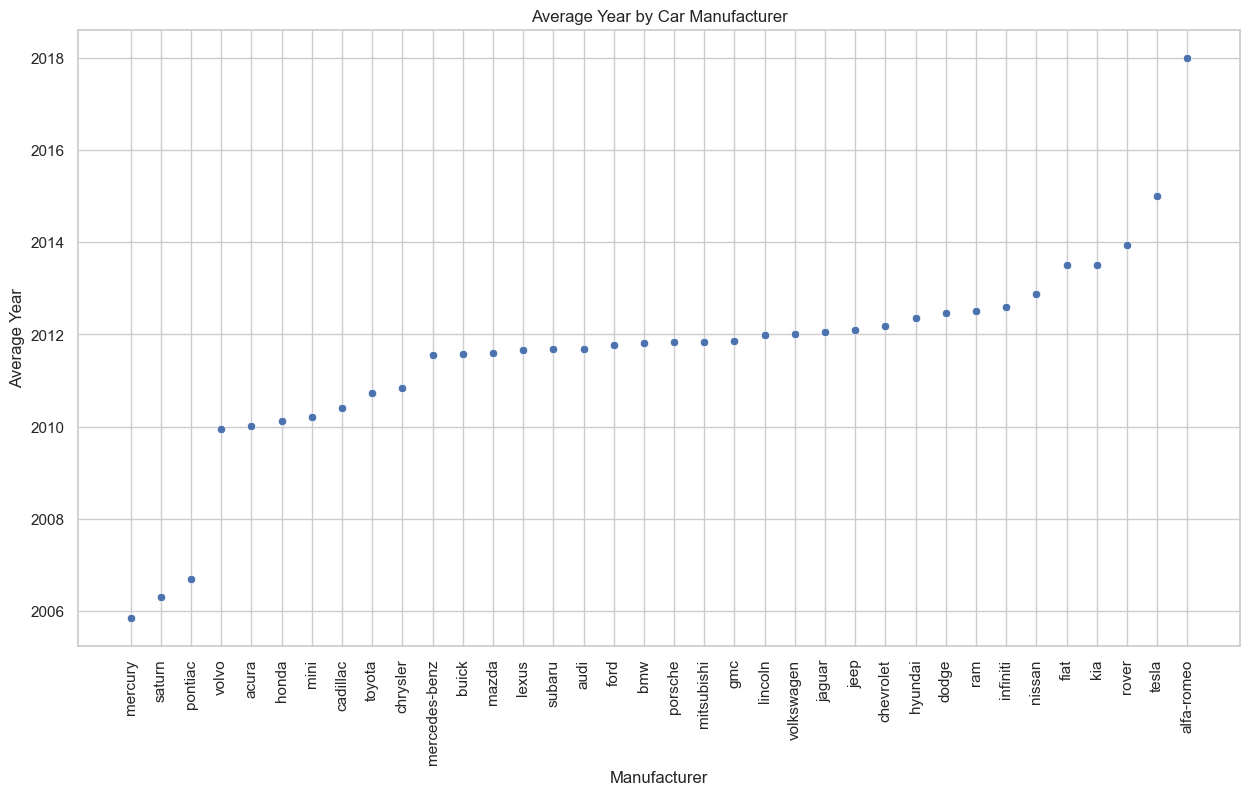

In [15]:
#repot only
#taking a spot check at the cleaned data to see what we can see at this point
#making a summary which may be useful later



grouped = cleaned_data.groupby('manufacturer')

average_year = grouped['year'].mean()
most_common_condition = grouped['condition'].agg(lambda x: pd.Series.mode(x)[0])
most_common_type = grouped['model based type'].agg(lambda x: pd.Series.mode(x)[0])
average_odometer = grouped['odometer'].mean()

summary_df = pd.DataFrame({
    'Average Year': average_year,
    'Most Common Condition': most_common_condition,
    'Most Common Type': most_common_type,
    'Average Odometer': average_odometer
})

summary_df.reset_index(inplace=True)
display(summary_df)


average_year_by_manufacturer = cleaned_data.groupby('manufacturer')['year'].mean().reset_index()

average_year_by_manufacturer = average_year_by_manufacturer.sort_values(by='year')

plt.figure(figsize=(15, 8))
sns.scatterplot(x='manufacturer', y='year', data=average_year_by_manufacturer)
plt.xticks(rotation=90)  
plt.xlabel('Manufacturer')
plt.ylabel('Average Year')
plt.title('Average Year by Car Manufacturer')
plt.show()

In [16]:
#7

correlation_matrix_encoded = encoded_data.corr().round(2) #added the rounding varible to play around with heatmap.
#removed heatmap due to size


#heatmap wasn't working at this size so switching to just text summary of the points which matter most. 

price_correlations = correlation_matrix_encoded['price'].drop('price')  

# Sort the correlations
sorted_correlations = price_correlations.sort_values(ascending=False)

# Top 20 positively correlated variables
top_20_positive = sorted_correlations.head(20)
print("Top 20 positively correlated variables with 'price':")
print(top_20_positive)

# Bottom 20 negatively correlated variables
bottom_20_negative = sorted_correlations.tail(20)
print("\nBottom 20 negatively correlated variables with 'price':")
print(bottom_20_negative)




Top 20 positively correlated variables with 'price':
year                          0.49
cylinders_8 cylinders         0.34
drive_4wd                     0.30
model based type_truck        0.30
model based size_full-size    0.27
model based type_other        0.20
model based type_pickup       0.18
model_super duty f-550 drw    0.18
model_corvette grand sport    0.15
model_camaro ss coupe 2d      0.14
model based type_coupe        0.14
model_super duty f-250 srw    0.12
paint_color_white             0.12
manufacturer_ram              0.12
manufacturer_chevrolet        0.12
model_sierra 2500hd           0.11
drive_rwd                     0.11
manufacturer_ford             0.11
condition_like new            0.10
model_corvette                0.10
Name: price, dtype: float64

Bottom 20 negatively correlated variables with 'price':
paint_color_blue             -0.06
model_accord                 -0.06
model_impala                 -0.06
paint_color_grey             -0.06
condition_excellent   

I now have too many columns  

looking at the database now. 900+ columns may be an issue later.
Honda is dragging price but looking at previous graph and table that may be due to hondas being old and sedans. 

In [17]:
cleaned_data.head()


encoded_data.head()

#correlation_matrix = encoded_data.corr()

#plt.figure(figsize=(5, 4))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
#plt.title('Heatmap of Correlation Matrix')

#print(encoded_data['condition'].dtype)

#print(encoded_data['condition'].value_counts())





,price,year,odometer,model based type_SUV,model based type_convertible,model based type_coupe,model based type_hatchback,model based type_mini-van,model based type_other,model based type_pickup,...,cylinders_other,model based size_compact,model based size_full-size,model based size_mid-size,model based size_sub-compact,condition_excellent,condition_fair,condition_good,condition_like new,condition_salvage
31,15000,2013.0,128000.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
34,35000,2019.0,43000.0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
35,29990,2016.0,17302.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
36,38590,2011.0,30237.0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
38,32990,2017.0,30041.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = encoded_data.drop('price', axis=1)
y = encoded_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  #starting points
lasso_model = Lasso(alpha=0.001)  

linear_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# Making predictions
linear_pred = linear_model.predict(X_test_scaled)
ridge_pred = ridge_model.predict(X_test_scaled)
lasso_pred = lasso_model.predict(X_test_scaled)

# Evaluating models
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

linear_mae = mean_absolute_error(y_test, linear_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

linear_r2 = r2_score(y_test, linear_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)





# We are using RMSE MAE and R Square to Evaluate Models

In [20]:
# Formatting the comparison data to display as real numbers
comparison_data = {
    'Model': ['Linear', 'Ridge', 'Lasso'],
    'RMSE': [f"{linear_rmse:.2f}", f"{ridge_rmse:.2f}", f"{lasso_rmse:.2f}"],
    'MAE': [f"{linear_mae:.2f}", f"{ridge_mae:.2f}", f"{lasso_mae:.2f}"],
    'R²': [f"{linear_r2:.2f}", f"{ridge_r2:.2f}", f"{lasso_r2:.2f}"]
}

comparison_table = pd.DataFrame(comparison_data)

comparison_table


,Model,RMSE,MAE,R²
0,Linear,1998844744213754.75,21158765853015.46,-26246410080805925683200.00
1,Ridge,6766.01,4230.78,0.70
2,Lasso,6766.11,4230.96,0.70


In [21]:
linear_train_rmse = np.sqrt(mean_squared_error(y_train, linear_model.predict(X_train_scaled)))
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train_scaled)))
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train_scaled)))

linear_train_mae = mean_absolute_error(y_train, linear_model.predict(X_train_scaled))
ridge_train_mae = mean_absolute_error(y_train, ridge_model.predict(X_train_scaled))
lasso_train_mae = mean_absolute_error(y_train, lasso_model.predict(X_train_scaled))

linear_train_r2 = r2_score(y_train, linear_model.predict(X_train_scaled))
ridge_train_r2 = r2_score(y_train, ridge_model.predict(X_train_scaled))
lasso_train_r2 = r2_score(y_train, lasso_model.predict(X_train_scaled))

# Updated comparison data including both training and testing metrics
comparison_data = {
    'Model': ['Linear', 'Ridge', 'Lasso'],
    'Train RMSE': [f"{linear_train_rmse:.2f}", f"{ridge_train_rmse:.2f}", f"{lasso_train_rmse:.2f}"],
    'Test RMSE': [f"{linear_rmse:.2f}", f"{ridge_rmse:.2f}", f"{lasso_rmse:.2f}"],
    'Train MAE': [f"{linear_train_mae:.2f}", f"{ridge_train_mae:.2f}", f"{lasso_train_mae:.2f}"],
    'Test MAE': [f"{linear_mae:.2f}", f"{ridge_mae:.2f}", f"{lasso_mae:.2f}"],
    'Train R²': [f"{linear_train_r2:.2f}", f"{ridge_train_r2:.2f}", f"{lasso_train_r2:.2f}"],
    'Test R²': [f"{linear_r2:.2f}", f"{ridge_r2:.2f}", f"{lasso_r2:.2f}"]
}

comparison_table = pd.DataFrame(comparison_data)

comparison_table


,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
0,Linear,6982.37,1998844744213754.75,4289.30,21158765853015.46,0.68,-26246410080805925683200.00
1,Ridge,6917.30,6766.01,4193.07,4230.78,0.69,0.70
2,Lasso,6917.38,6766.11,4193.23,4230.96,0.69,0.70


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

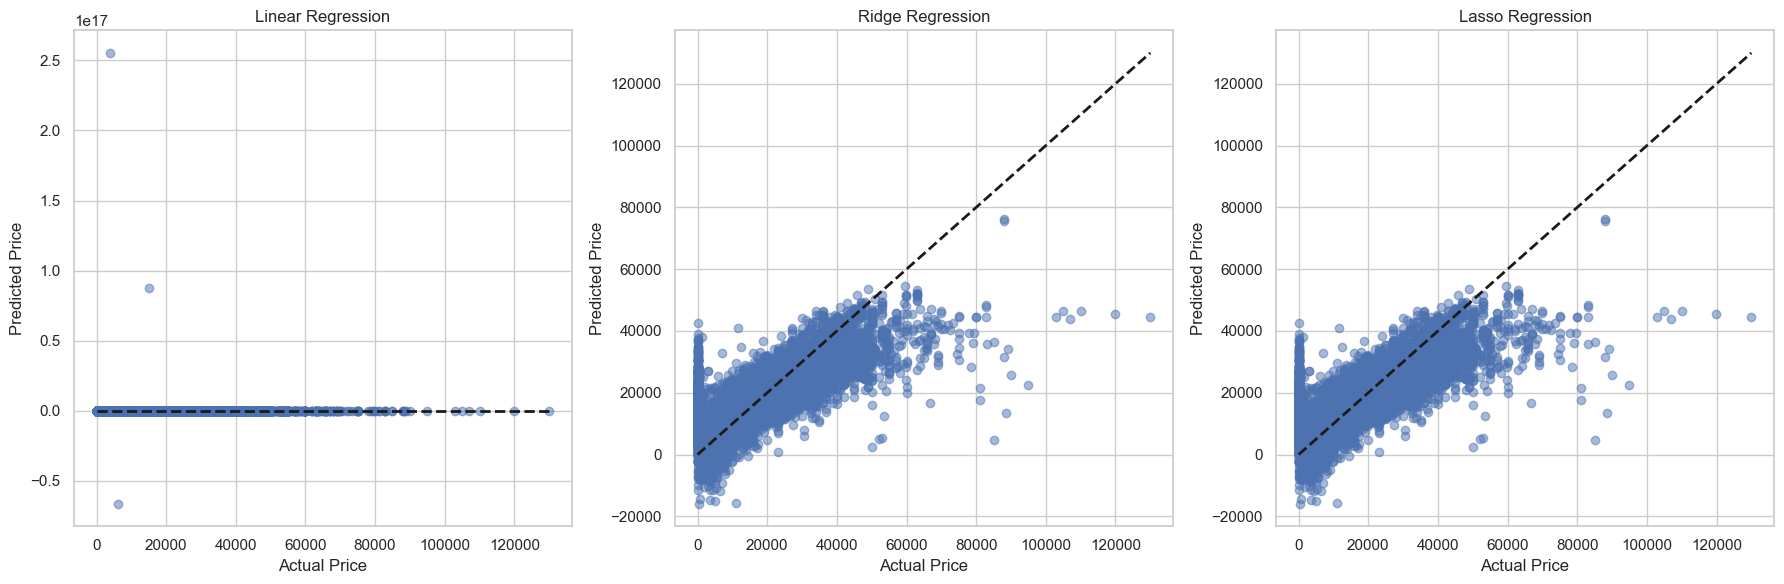

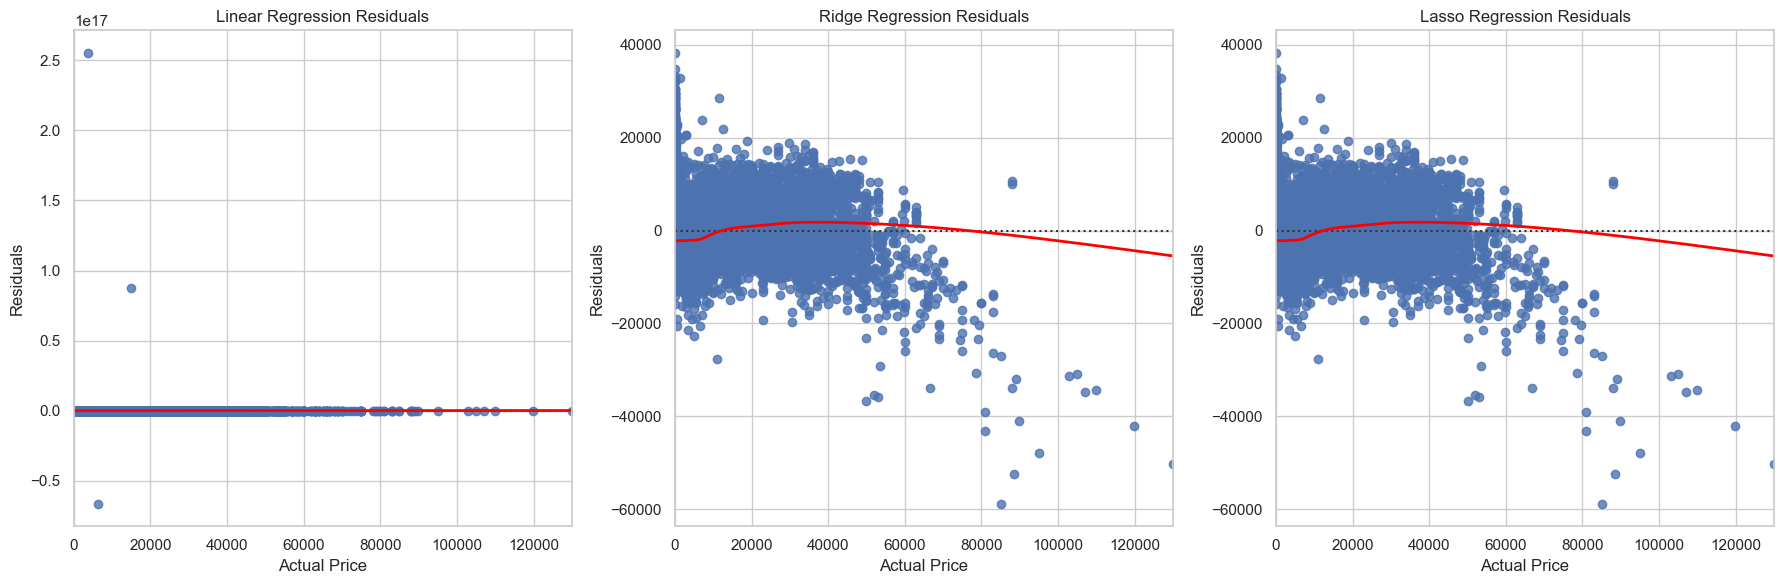

In [35]:
plt.figure(figsize=(18, 6))

# Linear Model
plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Ridge Model
plt.subplot(1, 3, 2)
plt.scatter(y_test, ridge_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Ridge Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Lasso Model
plt.subplot(1, 3, 3)
plt.scatter(y_test, lasso_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Lasso Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 6))

# Linear Regression Residuals
plt.subplot(1, 3, 1)
sns.residplot(x=y_test, y=linear_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Linear Regression Residuals')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')

# Ridge Regression Residuals
plt.subplot(1, 3, 2)
sns.residplot(x=y_test, y=ridge_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Ridge Regression Residuals')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')

# Lasso Regression Residuals
plt.subplot(1, 3, 3)
sns.residplot(x=y_test, y=lasso_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Lasso Regression Residuals')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


These are useful charts to aid in the evaluation of the models. Linear regression is clearly not working but Ridge and Lasso are showing decent results below the 60k price point.

# Model so far

The models can predict prices decently under 60k which is the majority of the used market. 

If this was to be revisited, there may be reason to create a seperate model for luxury used cars.

Alpha needs to be examined 



# Seeking Alphas

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

lasso = Lasso()

lasso_grid_search = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')

lasso_grid_search.fit(X_train_scaled, y_train)

best_parameters_lasso = lasso_grid_search.best_params_
best_score_lasso = lasso_grid_search.best_score_

print("Best Parameters for Lasso:", best_parameters_lasso)
print("Best Score for Lasso:", best_score_lasso)


Best Parameters for Lasso: {'alpha': 10}
Best Score for Lasso: -50038590.53652122


In [24]:

# Define the parameter grid for Ridge
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge = Ridge()

ridge_grid_search = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')

ridge_grid_search.fit(X_train_scaled, y_train)

best_parameters_ridge = ridge_grid_search.best_params_
best_score_ridge = ridge_grid_search.best_score_

print("Best Parameters for Ridge:", best_parameters_ridge)
print("Best Score for Ridge:", best_score_ridge)


Best Parameters for Ridge: {'alpha': 100}
Best Score for Ridge: -50129558.11418245


In [25]:
# Ridge with alpha = 100
ridge_model_100 = Ridge(alpha=100)
ridge_model_100.fit(X_train_scaled, y_train)

Ridge(alpha=100)

In [26]:
# Lasso with alpha = 10
lasso_model_10 = Lasso(alpha=10)
lasso_model_10.fit(X_train_scaled, y_train)

Lasso(alpha=10)

In [27]:

# Ridge with alpha = 100
ridge_train_rmse_100 = np.sqrt(mean_squared_error(y_train, ridge_model_100.predict(X_train_scaled)))
ridge_test_rmse_100 = np.sqrt(mean_squared_error(y_test, ridge_model_100.predict(X_test_scaled)))
ridge_train_mae_100 = mean_absolute_error(y_train, ridge_model_100.predict(X_train_scaled))
ridge_test_mae_100 = mean_absolute_error(y_test, ridge_model_100.predict(X_test_scaled))
ridge_train_r2_100 = r2_score(y_train, ridge_model_100.predict(X_train_scaled))
ridge_test_r2_100 = r2_score(y_test, ridge_model_100.predict(X_test_scaled))

# Lasso with alpha = 10
lasso_train_rmse_10 = np.sqrt(mean_squared_error(y_train, lasso_model_10.predict(X_train_scaled)))
lasso_test_rmse_10 = np.sqrt(mean_squared_error(y_test, lasso_model_10.predict(X_test_scaled)))
lasso_train_mae_10 = mean_absolute_error(y_train, lasso_model_10.predict(X_train_scaled))
lasso_test_mae_10 = mean_absolute_error(y_test, lasso_model_10.predict(X_test_scaled))
lasso_train_r2_10 = r2_score(y_train, lasso_model_10.predict(X_train_scaled))
lasso_test_r2_10 = r2_score(y_test, lasso_model_10.predict(X_test_scaled))


In [30]:
print(f"Ridge Model (alpha=100) - Train MAE: {ridge_train_mae_100:.2f}, Train RMSE: {ridge_train_rmse_100:.2f}, Train R²: {ridge_train_r2_100:.2f}")
print(f"Ridge Model (alpha=100) - Test MAE: {ridge_test_mae_100:.2f}, Test RMSE: {ridge_test_rmse_100:.2f}, Test R²: {ridge_test_r2_100:.2f}")
print(f"Lasso Model (alpha=10) - Train MAE: {lasso_train_mae_10:.2f}, Train RMSE: {lasso_train_rmse_10:.2f}, Train R²: {lasso_train_r2_10:.2f}")
print(f"Lasso Model (alpha=10) - Test MAE: {lasso_test_mae_10:.2f}, Test RMSE: {lasso_test_rmse_10:.2f}, Test R²: {lasso_test_r2_10:.2f}")

Ridge Model (alpha=100) - Train MAE: 4191.61, Train RMSE: 6917.62, Train R²: 0.69
Ridge Model (alpha=100) - Test MAE: 4229.14, Test RMSE: 6766.51, Test R²: 0.70
Lasso Model (alpha=10) - Train MAE: 4173.17, Train RMSE: 6926.24, Train R²: 0.69
Lasso Model (alpha=10) - Test MAE: 4199.72, Test RMSE: 6763.45, Test R²: 0.70


In [34]:
 
# Updated comparison data including all models
comparison_data2 = {
    'Model': ['Linear', 'Ridge - Alpha 1', 'Ridge - Alpha 100', 'Lasso - Alpha 0.001', 'Lasso - Alpha 10'],
    'Train RMSE': [f"{linear_train_rmse:.2f}", f"{ridge_train_rmse:.2f}", f"{ridge_train_rmse_100:.2f}", f"{lasso_train_rmse:.2f}", f"{lasso_train_rmse_10:.2f}"],
    'Test RMSE': [f"{linear_rmse:.2f}", f"{ridge_rmse:.2f}", f"{ridge_test_rmse_100:.2f}", f"{lasso_rmse:.2f}", f"{lasso_test_rmse_10:.2f}"],
    'Train MAE': [f"{linear_train_mae:.2f}", f"{ridge_train_mae:.2f}", f"{ridge_train_mae_100:.2f}", f"{lasso_train_mae:.2f}", f"{lasso_train_mae_10:.2f}"],
    'Test MAE': [f"{linear_mae:.2f}", f"{ridge_mae:.2f}", f"{ridge_test_mae_100:.2f}", f"{lasso_mae:.2f}", f"{lasso_test_mae_10:.2f}"],
    'Train R²': [f"{linear_train_r2:.2f}", f"{ridge_train_r2:.2f}", f"{ridge_train_r2_100:.2f}", f"{lasso_train_r2:.2f}", f"{lasso_train_r2_10:.2f}"],
    'Test R²': [f"{linear_r2:.2f}", f"{ridge_r2:.2f}", f"{ridge_test_r2_100:.2f}", f"{lasso_r2:.2f}", f"{lasso_test_r2_10:.2f}"]
}

comparison_table = pd.DataFrame(comparison_data2)

# Displaying the updated table
comparison_table

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
0,Linear,6982.37,1998844744213754.75,4289.30,21158765853015.46,0.68,-26246410080805925683200.00
1,Ridge - Alpha 1,6917.30,6766.01,4193.07,4230.78,0.69,0.70
2,Ridge - Alpha 100,6917.62,6766.51,4191.61,4229.14,0.69,0.70
3,Lasso - Alpha 0.001,6917.38,6766.11,4193.23,4230.96,0.69,0.70
4,Lasso - Alpha 10,6926.24,6763.45,4173.17,4199.72,0.69,0.70


Only marginal gains were made by changing alpha. This may be a sign of more work being needed but for compute considerations, given the r value, we are moving on. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

We have a decent model for predicting used cars in the most common pricing range with an r square value of .7. Both the lasso and ridge models performed extremely similarly and both showed signs of weakness once prices reached above $50k therefore this may only be a useful model for used cars under $50k in value. 

Key findings:

    Trucks command higher prices: Truck models and the category as a whole showed many of the strongest positive correlation to price.
    
    If its not a truck, make a something with a big engine: The cars which weren't trucks driving price all had big engines too with models like camaros and corvettes are good bets
    
    Sedans are out of style: Sedans pulled down prices as well as anything with a smaller engine. 
    
    Front wheel drive will drag prices: People are willing to pay more for any other kind of drivetrain. 
    
    Mileage is King: Intuitively, the higher the milage, the lower the price. No other variable had a strong correlation to price.
    
    Stay away from colors: White is popular while colors such as blue and silver dragged price down. 
    
Use case of model: With little training this model can help any dealer set price by using the prdict_price command.

Limitations: The model excludes any car older than 20 years old and should not be used with a possible value of over $60k. The chart below shows that the model can closely predict pricing at low price ranges and has a bias toward lower prices. The risk to the dealership is that this model will undervalue a car, so use when buying a car for inventory, not when selling a car. 



Text(0, 0.5, 'Predicted Price')

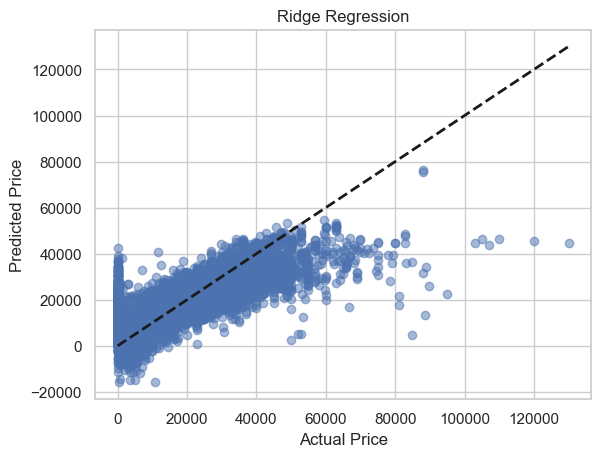

In [32]:
# Ridge Model

plt.scatter(y_test, ridge_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Ridge Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

Next Steps would be to further refine the model while an r square of .7 is satisfactory at this stage there are still questions. The model should be split into high and low price used cars. Data should be further investigated for better and more efficient use of one hot use. Right now there are over 900 columns which may be creating overfitting as well as over representation of extremely correlated columns. 